<center>
<h1> Machine Vision (BCSE417P) LAB ASSIGNMENT 2 </h1>

</center>


## Name: Joel James
## Register Number: 21BAI1369



In [17]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

# TASK-1: Geometric Rectification of Satellite Imagery

Objective: Correct the geometric distortions in satellite images using bilinear interpolation.

Materials: A distorted satellite image, ground control points (GCPs), and image processing software (such as Python with OpenCV). 

Steps:

- Import the distorted satellite image into the image processing software.

- Identify and mark ground control points (GCPs) on the distorted image.

- Define the corresponding coordinates for the GCPs in the rectified image.

- Apply a transformation matrix to map the distorted image to the corrected coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified image with the original image to evaluate the effectiveness of the 
rectification process.

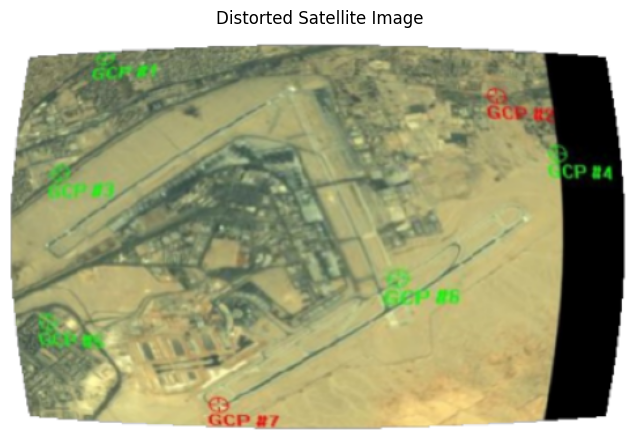

In [19]:
# Load the distorted satellite image from the specified path
image_distorted = cv2.imread(r"C:\Users\Joelk\Pictures\Screenshots\distortedSatellite.png")

# Switch the image from BGR format to RGB format for displaying in matplotlib
image_rgb = cv2.cvtColor(image_distorted, cv2.COLOR_BGR2RGB)

# Visualize the distorted image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Distorted Satellite Image')
plt.axis('off')
plt.show()


In [20]:
# Identifying Ground Control Points (GCPs) on the distorted image

coordinates = []
def capture_click(event, x_pos, y_pos, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coordinates.append((x_pos, y_pos))

cv2.namedWindow("Satellite Image")
cv2.setMouseCallback("Satellite Image", capture_click)

while True:
    cv2.imshow("Satellite Image", image_rgb)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()
gcp_points = np.array(coordinates, dtype=np.float32)
print("GCP Points: ", gcp_points)


GCP Points:  [[ 84.  21.]
 [477. 109.]
 [184. 323.]
 [ 33. 252.]]


In [27]:
# Define the corresponding Ground Control Points (GCPs) in the rectified image (target geometry)
target_gcp = np.array([[80, 6], [489, 100], [191, 325], [36, 251]], dtype=np.float32)


In [28]:
# Calculate the perspective transformation matrix
perspective_matrix = cv2.getPerspectiveTransform(gcp_points, target_gcp)

print("Perspective Transformation Matrix:\n", perspective_matrix)


Perspective Transformation Matrix:
 [[ 1.08196389e+00  7.36692202e-02 -1.43144706e+01]
 [ 1.38723138e-02  1.13474135e+00 -2.35183411e+01]
 [ 2.51223839e-05  2.01656371e-04  1.00000000e+00]]


In [29]:
# Retrieve dimensions of the distorted image
height, width = image_rgb.shape[:2]

# Apply the perspective transformation using bilinear interpolation
rectified_image = cv2.warpPerspective(image_rgb, perspective_matrix, (width, height), flags=cv2.INTER_LINEAR)


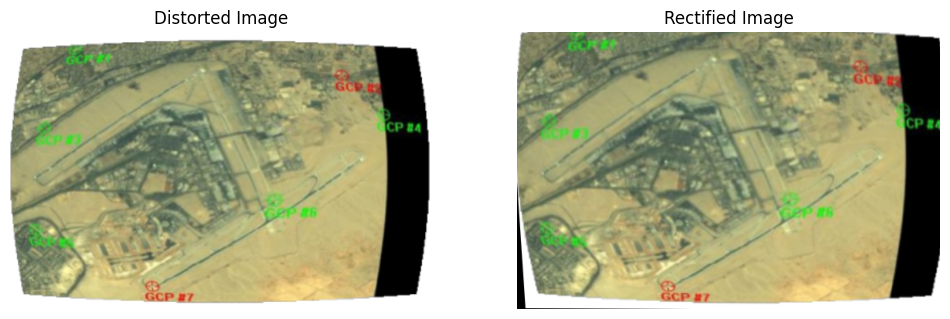

In [30]:
# Display side-by-side comparison of distorted and rectified images

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(rectified_image)
plt.axis('off')
plt.title('Rectified Image')

plt.show()


OBSERVATIONS:

- The outlined procedure from the task description has been thoroughly followed.

- The input consists of a perspective-distorted satellite image marked with Ground Control Points (GCPs). Bilinear interpolation is employed to rectify the geometric distortion by referencing accurate GCP coordinates for the transformation matrix application.

- The GCP pixel coordinates in the distorted image are selected through a manual, point-and-click interface implemented via OpenCV. The distorted image is displayed in a window, allowing the user to click on the center of each required GCP marker. The mouse click's position relative to the image is captured, and the selected pixel’s coordinates are appended to a list of GCPs.

- As the accurate coordinates of the undistorted GCP markers were unavailable, a trial-and-error method was adopted to identify the correct reference points needed to compute the transformation matrix.

- After applying bilinear interpolation, the perspective distortion in the satellite image is successfully corrected, and the resulting rectified image is displayed.

# TASK-2: Medical Image Rectification

Objective: Rectify distortions in MRI images using bilinear interpolation. 

Materials: Distorted MRI images, reference anatomical model, and image processing software. 

Steps:

- Import the distorted MRI image into the image processing software.

- Identify and mark key points on the distorted MRI image.

- Obtain the corresponding coordinates from the reference anatomical model.

- Apply a transformation matrix to align the MRI image with the reference model.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified MRI image with the reference model to assess accuracy.

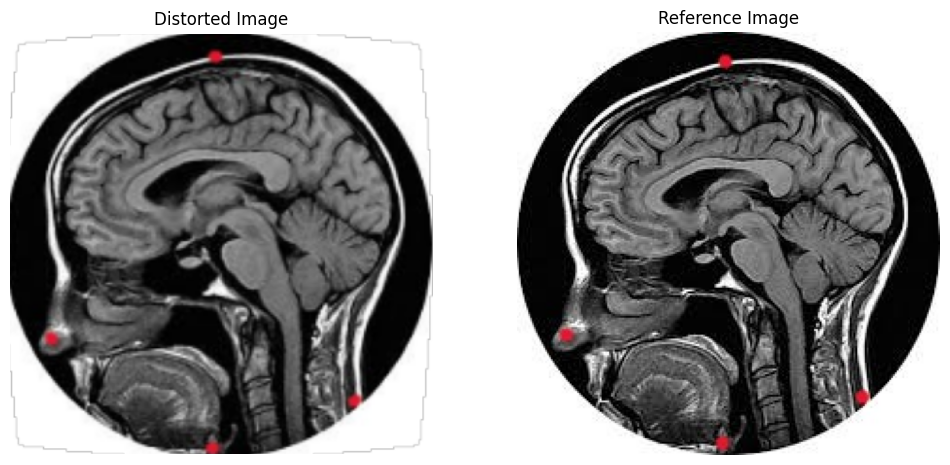

In [32]:
# Load the distorted and reference MRI images
image_distorted = cv2.imread(r"C:\Users\Joelk\Pictures\Screenshots\distortedMRI.png")
image_reference = cv2.imread(r"C:\Users\Joelk\Downloads\mri.jpg")

# Display both images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_distorted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_reference, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image')

plt.show()


In [33]:
# Identify key points on the distorted MRI image

key_points = []
def on_mouse_click(event, x_pos, y_pos, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        key_points.append((x_pos, y_pos))

cv2.namedWindow("MRI Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("MRI Image", 800, 600)
cv2.setMouseCallback("MRI Image", on_mouse_click)

while True:
    cv2.imshow("MRI Image", image_distorted)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()
source_points = np.array(key_points, dtype=np.float32)
print("Source Points: ", source_points)


Source Points:  [[211.  26.]
 [ 42. 313.]
 [209. 426.]
 [352. 380.]]


In [34]:
# Identify key points on the reference MRI image

reference_points = []
def on_mouse_click(event, x_pos, y_pos, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        reference_points.append((x_pos, y_pos))

cv2.namedWindow("Reference Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Reference Image", 800, 600)
cv2.setMouseCallback("Reference Image", on_mouse_click)

while True:
    cv2.imshow("Reference Image", image_reference)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()
destination_points = np.array(reference_points, dtype=np.float32)
print("Destination Points: ", destination_points)


Destination Points:  [[111.  17.]
 [ 27. 162.]
 [109. 219.]
 [184. 194.]]


In [35]:
# Compute the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(source_points, destination_points)

print("Transformation Matrix:\n", transformation_matrix)


Transformation Matrix:
 [[ 4.55775144e-01 -1.39330938e-02  1.11471209e+01]
 [-3.64662499e-02  4.63514503e-01  1.20232545e+01]
 [-1.59796429e-04 -1.05333368e-04  1.00000000e+00]]


In [36]:
# Get dimensions of the distorted image
image_height, image_width = image_distorted.shape[:2]

# Apply perspective transformation with bilinear interpolation
rectified_image = cv2.warpPerspective(image_distorted, transformation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)


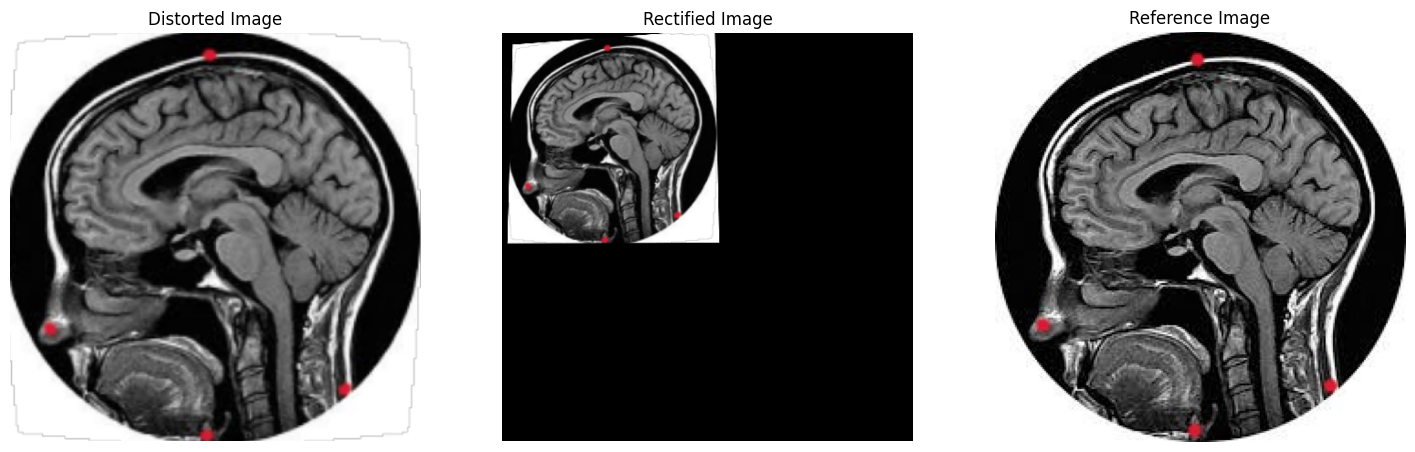

In [37]:
# Display side-by-side comparison of distorted, rectified, and reference images

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_distorted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rectified Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_reference, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image')

plt.show()


**Observations:**

- An MRI reference image (brain scan) was obtained, with four key points marked.

- A distorted version of the MRI image, also with corresponding key points marked, was imported into the editor.

- The distorted image exhibits noticeable perspective and skew distortions.

- The pixel coordinates of the key areas in both the distorted and reference images were captured using the point-and-click GUI developed earlier.

- These source and destination pixel mappings were utilized to compute the transformation matrix.

- A perspective transform was applied to correct the distortions in the MRI image. Bilinear interpolation was employed to resample the pixels and achieve the rectified image.

- The rectified image was then compared side-by-side with the original distorted image and the ideal reference image.

# TASK-3: Drone Image Rectification

Objective: Correct the geometric distortions in drone-captured images of an agricultural field using bilinear interpolation. 

Materials: Distorted drone images, control points from known field locations, and image processing software. 

Steps:

- Import the distorted drone image into the image processing software.

- Identify and mark control points on the distorted image.

- Define the corresponding coordinates for the control points in the rectified image.

- Apply a transformation matrix to map the distorted image to the corrected coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Generate an orthophoto of the field and compare it with the original image.


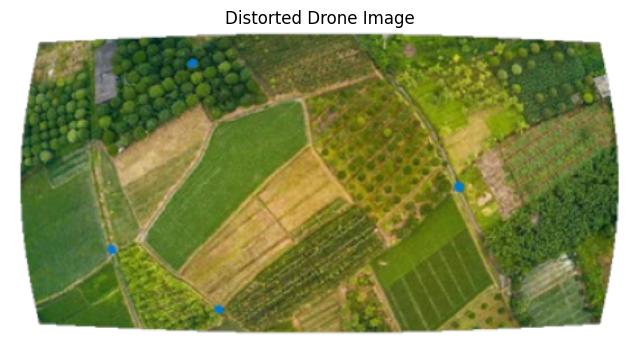

In [41]:
# Load the distorted drone image
image_distorted_drone = cv2.imread(r"C:\Users\Joelk\Pictures\Screenshots\distortedDrone.png")

# Convert the image from BGR to RGB for display in matplotlib
image_rgb_drone = cv2.cvtColor(image_distorted_drone, cv2.COLOR_BGR2RGB)

# Display the distorted drone image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb_drone)
plt.title('Distorted Drone Image')
plt.axis('off')
plt.show()


In [42]:
# Identify control points (CPs) on the distorted drone image

control_points = []
def on_mouse_click(event, x_pos, y_pos, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        control_points.append((x_pos, y_pos))

cv2.namedWindow("Drone Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Drone Image", 800, 600)
cv2.setMouseCallback("Drone Image", on_mouse_click)

while True:
    cv2.imshow("Drone Image", image_distorted_drone)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()
source_points = np.array(control_points, dtype=np.float32)
print("Source Points: ", source_points)


Source Points:  [[162.  30.]
 [ 91. 196.]
 [186. 250.]
 [402. 136.]]


In [43]:
# Define the corresponding control points (CPs) in the rectified image (target geometry)
destination_points = np.array([[199, 38], [113, 243], [230, 313], [487, 176]], dtype=np.float32)

In [44]:
# Compute the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(source_points, destination_points)

print("Transformation Matrix:\n", transformation_matrix)


Transformation Matrix:
 [[ 1.23877778e+00 -3.46571608e-03  5.07662067e-01]
 [ 4.04605983e-02  1.24410920e+00 -5.47962029e+00]
 [ 7.48334618e-05 -5.47386988e-05  1.00000000e+00]]


In [45]:
# Get the dimensions of the distorted drone image
image_height, image_width = image_distorted_drone.shape[:2]

# Apply the perspective transformation with bilinear interpolation
rectified_image_drone = cv2.warpPerspective(image_distorted_drone, transformation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)


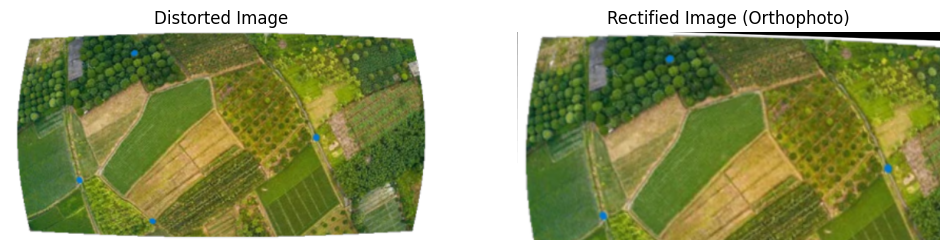

In [46]:
# Display side-by-side comparison of distorted and rectified drone images

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_distorted_drone, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_image_drone, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rectified Image (Orthophoto)')

plt.show()


**Observations:**

- The process outlined in the task description was followed precisely.

- A perspective-distorted drone image with control point (CP) markers was used as input. Bilinear interpolation was applied to correct the geometric distortion in the image, utilizing the precise coordinates of the CPs as reference points for the transformation matrix.

- The pixel coordinates of the CPs in the distorted image were selected through a manual point-and-click interface developed with OpenCV. The distorted image was displayed in a window, allowing the user to click on the center of each CP marker. The coordinates of these clicks were recorded and appended to a list of CP coordinates.

- As the correct (undistorted) coordinates of the CP markers were not available, a trial-and-error approach was employed to determine the accurate reference coordinates for calculating the transformation matrix.

- The perspective distortion in the drone image was corrected using bilinear interpolation, and the rectified image was displayed for comparison.

# TASK-4: Historical Photo Restoration

Objective: Rectify and restore old, distorted photographs using bilinear interpolation. 

Materials: Scanned old photographs, reference images, and image processing software. 

Steps:

- Import the scanned old photograph into the image processing software.

- Identify and mark key points on the distorted photograph.

- Obtain the corresponding coordinates from a reference image or known dimensions.

- Apply a transformation matrix to align the distorted photograph with the reference 
coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified photograph with the original scanned image and the reference image.


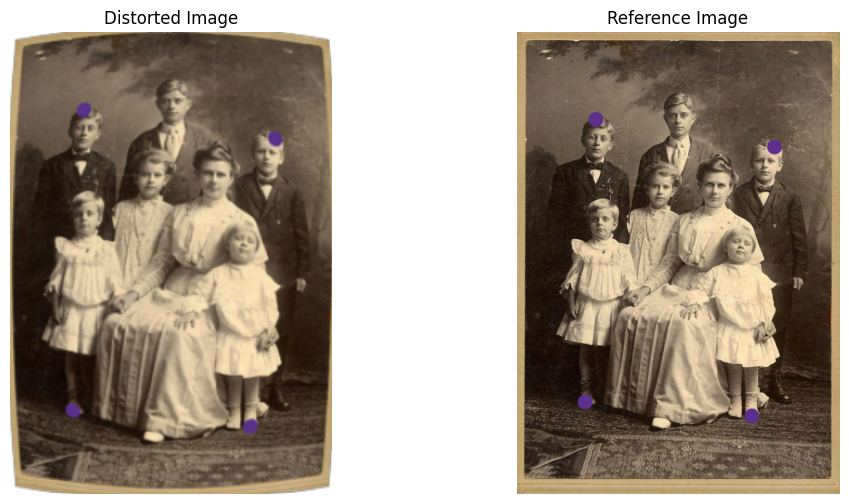

In [48]:
# Load the distorted and reference architectural images
image_distorted_arch = cv2.imread(r"C:\Users\Joelk\Pictures\Screenshots\distortedOldPhoto.png")
image_reference_arch = cv2.imread(r"C:\Users\Joelk\Downloads\oldPhoto.jpg")

# Convert images from BGR to RGB for display in matplotlib
image_rgb_distorted_arch = cv2.cvtColor(image_distorted_arch, cv2.COLOR_BGR2RGB)
image_rgb_reference_arch = cv2.cvtColor(image_reference_arch, cv2.COLOR_BGR2RGB)

# Display both images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb_distorted_arch)
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(image_rgb_reference_arch)
plt.axis('off')
plt.title('Reference Image')

plt.show()

In [49]:
# Define the approximate camera matrix
image_height, image_width = image_distorted_arch.shape[:2]
camera_matrix = np.array([[image_width, 0, image_width / 2], 
                          [0, image_height, image_height / 2], 
                          [0, 0, 1]], dtype=np.float32)

# Define the distortion coefficients for fish-eye/barrel distortion effect
distortion_coefficients = np.array([-0.4, 0.1, 0, 0, 0], dtype=np.float32)

In [50]:
# Compute the undistortion and rectification transformation map
optimal_camera_matrix, _ = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion_coefficients, (image_width, image_height), 1, (image_width, image_height))
map_x, map_y = cv2.initUndistortRectifyMap(camera_matrix, distortion_coefficients, None, optimal_camera_matrix, (image_width, image_height), cv2.CV_32FC1)

# Apply the remap with bilinear interpolation
rectified_image_arch = cv2.remap(image_distorted_arch, map_x, map_y, interpolation=cv2.INTER_LINEAR)


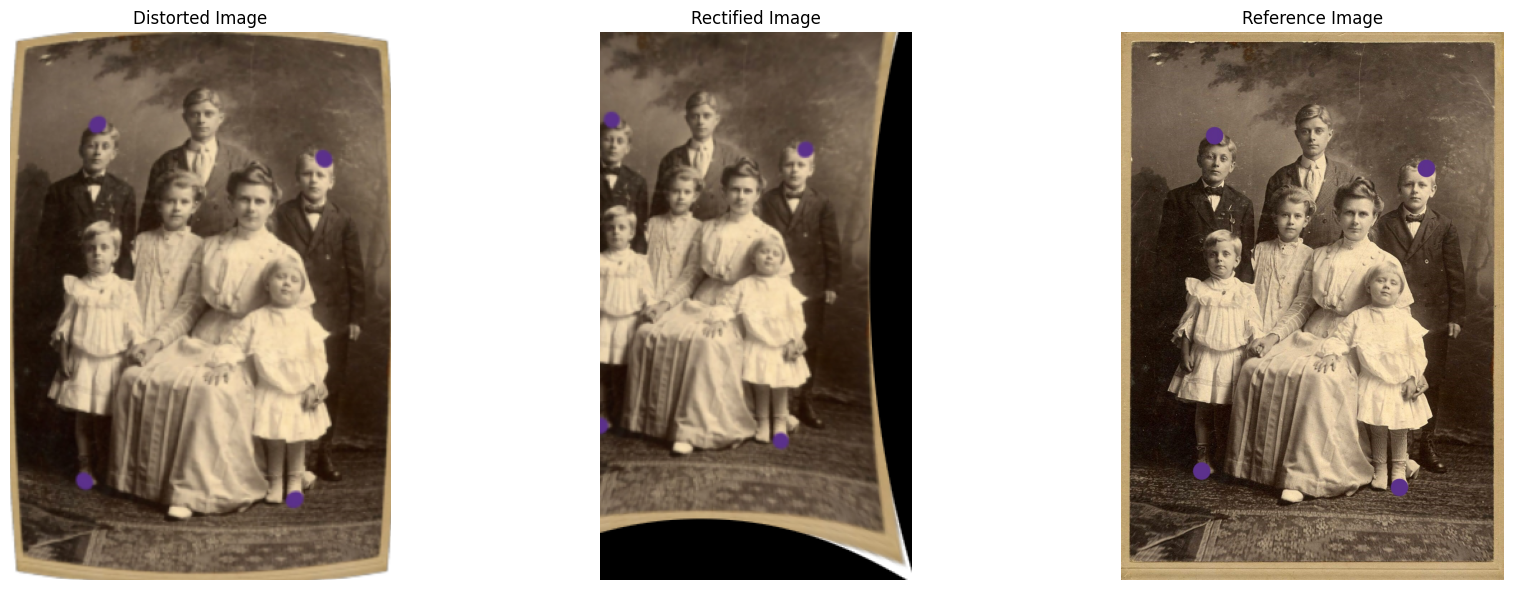

In [51]:
# Display side-by-side comparison of distorted, rectified, and reference images

plt.figure(figsize=(18, 6))

# Display the distorted image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_distorted_arch, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Distorted Image')

# Crop the rectified image for a neater presentation
crop_x_start, crop_y_start = 79, 44
crop_x_end, crop_y_end = 820, 454
cropped_rectified_image = rectified_image_arch[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

# Display the cropped rectified image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cropped_rectified_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rectified Image')

# Display the reference image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_reference_arch, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image')

plt.tight_layout()
plt.show()


**Observations:**

The historical photo used contains fish-eye distortion, also known as barrel distortion, which stretches the image outward. The correction process involves:

- **Camera Matrix:** This 3x3 matrix includes intrinsic camera parameters, such as focal lengths (`f_x` and `f_y`) and the principal point (`c_x`, `c_y`), essential for projecting 3D points onto a 2D image. The approximations used are:

  - `f_x = width`
  - `f_y = height`
  - `c_x = width / 2`
  - `c_y = height / 2`

  The matrix's final row `[0, 0, 1]` ensures it is a homogeneous transformation matrix, required for 3D-to-2D projection mathematics.

- **Distortion Coefficients:** These coefficients quantify the lens's distortion effect. The primary coefficient, `k1`, addresses radial distortion. A negative `k1` value indicates barrel distortion, where the image bulges outward. 

  Through trial and error, `k1 = -0.4` was chosen as the optimal coefficient to correct the barrel distortion, bringing the image closest to its undistorted state.

- **Undistortion Process:** Using OpenCV’s `cv2.initUndistortRectifyMap()` and `cv2.remap()`, the camera matrix and distortion coefficients are applied to correct the distorted image. Bilinear interpolation is used during resampling to ensure smoothness.


# TASK-5: Architectural Image Rectification

Objective: Rectify perspective distortions in architectural images using bilinear interpolation. 

Materials: Distorted architectural images, known dimensions of the building, and image processing software. 

Steps:

- Import the distorted architectural image into the image processing software.

- Identify and mark key points on the distorted image corresponding to known dimensions of the building.

- Define the corresponding coordinates for these points in the rectified image.

- Apply a transformation matrix to align the distorted image with the known dimensions.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified image with the original distorted image to evaluate the correction.


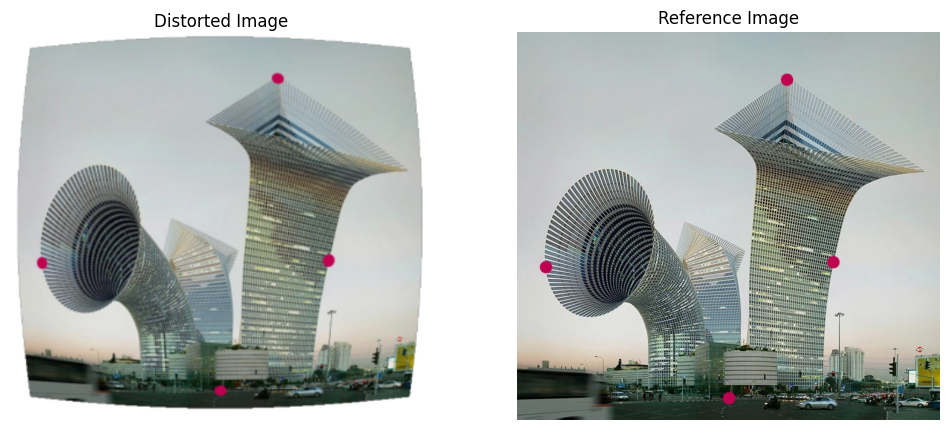

In [52]:
# Load the distorted and reference architectural images
distorted_image_arch = cv2.imread(r"C:\Users\Joelk\Pictures\Screenshots\distortedArchitecture.png")
reference_image_arch = cv2.imread(r"C:\Users\Joelk\Downloads\architecture.jpg")

# Convert images from BGR to RGB for display in matplotlib
distorted_image_rgb = cv2.cvtColor(distorted_image_arch, cv2.COLOR_BGR2RGB)
reference_image_rgb = cv2.cvtColor(reference_image_arch, cv2.COLOR_BGR2RGB)

# Display both images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(distorted_image_rgb)
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(reference_image_rgb)
plt.axis('off')
plt.title('Reference Image')

plt.show()


In [53]:
# List to store selected points
key_points = []

# Function to handle mouse events
def select_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        key_points.append((x, y))

# Create a window and set up mouse callback
cv2.namedWindow("Architectural Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Architectural Image", 800, 600)
cv2.setMouseCallback("Architectural Image", select_points)

# Display the image and wait for user input
while True:
    cv2.imshow("Architectural Image", distorted_image_arch)
    if cv2.waitKey(1) & 0xFF == 27:  # Escape key to exit
        break

# Clean up
cv2.destroyAllWindows()

# Convert list of points to NumPy array
source_points = np.array(key_points, dtype=np.float32)
print("Source points: ", source_points)


Source points:  [[319.  55.]
 [378. 271.]
 [250. 423.]
 [ 39. 277.]]


In [54]:
# List to store selected points
reference_points = []

# Function to handle mouse events
def select_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        reference_points.append((x, y))

# Create a window and set up mouse callback
cv2.namedWindow("Architectural Reference Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Architectural Reference Image", 800, 600)
cv2.setMouseCallback("Architectural Reference Image", select_points)

# Display the image and wait for user input
while True:
    cv2.imshow("Architectural Reference Image", reference_image_arch)
    if cv2.waitKey(1) & 0xFF == 27:  # Escape key to exit
        break

# Clean up
cv2.destroyAllWindows()

# Convert list of points to NumPy array
destination_points = np.array(reference_points, dtype=np.float32)
print("Destination points: ", destination_points)


Destination points:  [[449.  79.]
 [524. 382.]
 [352. 611.]
 [ 48. 395.]]


In [55]:
# Compute the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(source_points, destination_points)

print("Transformation Matrix:\n", transformation_matrix)


Transformation Matrix:
 [[ 1.52032296e+00 -6.48662894e-02  5.50721021e+00]
 [ 9.91475656e-02  1.47511719e+00 -2.70871702e+01]
 [ 2.86877023e-04 -1.28248357e-04  1.00000000e+00]]


In [56]:
# Get dimensions of the distorted image
height, width = distorted_image_arch.shape[:2]

# Apply perspective transformation with bilinear interpolation
rectified_image = cv2.warpPerspective(distorted_image_arch, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)


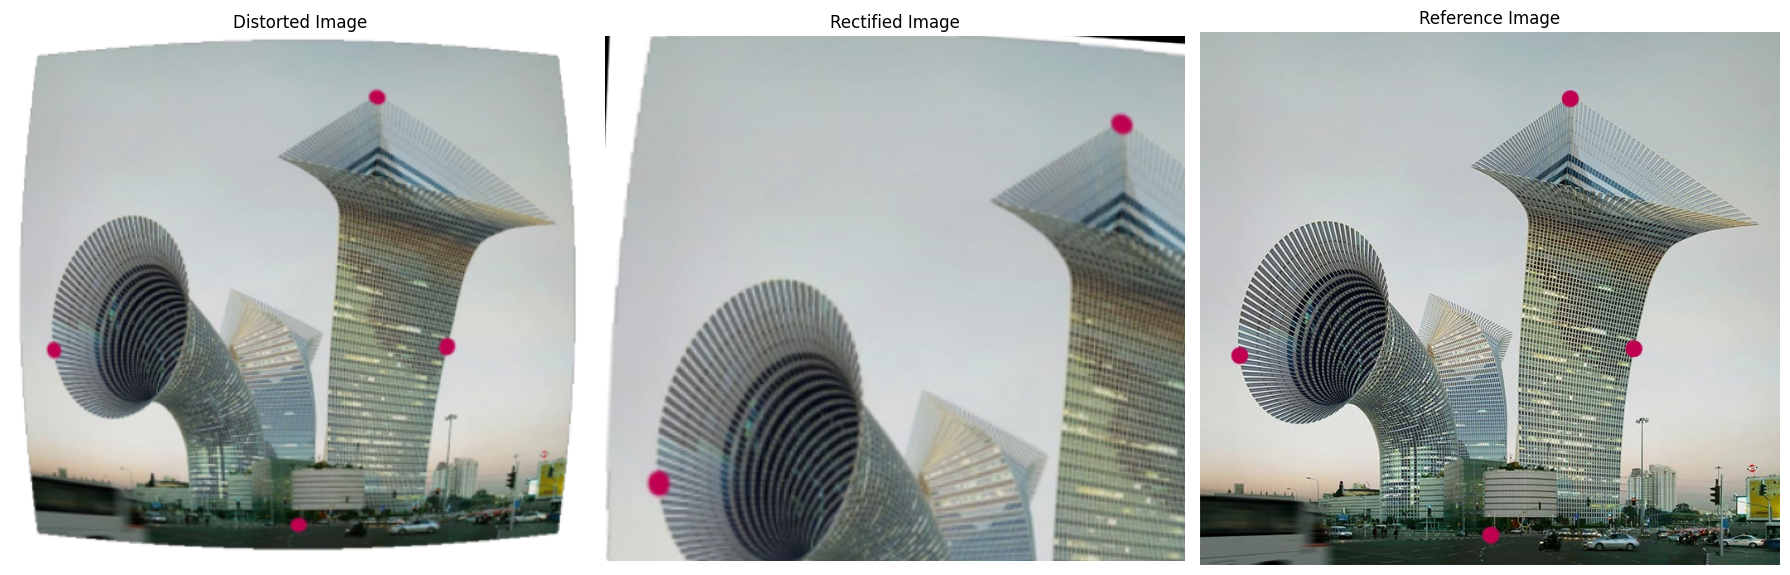

In [57]:
# Display side-by-side comparison of the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(distorted_image_arch, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Distorted Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rectified Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(reference_image_arch, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image')

plt.tight_layout()
plt.show()


**Observations:**

- An architectural reference image with four key points marked is obtained.

- A distorted version of this image, also marked with corresponding key points, is imported for processing.

- The distorted image displays notable perspective and skew distortions.

- Key point coordinates in both the distorted and reference images are manually selected using a point-and-click GUI.

- These source and destination pixel coordinates are used to compute a perspective transformation matrix.

- To correct the distortions in the architectural image, a perspective transformation is applied, and bilinear interpolation is used to resample the pixels for smooth results.

- The rectified image is then compared with the original distorted image and the reference image to evaluate the effectiveness of the correction.

